# Information Retrieval and Web Analytics

# Indexing + Modeling (TF-IDF)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Python packages
Let's first import all the packages that you will need during this assignment.

In [2]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import pandas as pd
from IPython.display import display
import json

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#### Load data into memory
The dataset is stored in the TSV file, and it contains 4000 tweets. For each article we have the document id, document title and document body separated by "|" character.

In [4]:
docs_path = '/content/drive/MyDrive/Recuperació de la informació en la Web/Seminaris _ Practiques/PROJECT FIRST PART/IRWA_data_2023/Rus_Ukr_war_data.json'

maping_doc = '/content/drive/MyDrive/Recuperació de la informació en la Web/Seminaris _ Practiques/PROJECT FIRST PART/IRWA_data_2023/Rus_Ukr_war_data_ids.csv'

tweets = []
with open(docs_path, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweets.append(tweet)

with open(maping_doc) as fp2:
    lines = fp2.readlines()
lines = [l.split() for l in lines]

mapping_dt = pd.DataFrame(lines, columns=['doc_id', 'id'])


In [5]:
print("Total number of tweets: {}".format(len(tweets)))

Total number of tweets: 4000


Implement the function ```build_terms(line)```.

It takes as input a text and performs the following operations:

- Transform all text to lowercase
- Tokenize the text to get a list of terms (use *split function*)
- Remove stop words
- Stem terms (example: to stem the term 'researcher', you will use ```stemmer.stem(researcher)```)

In [6]:
def build_terms(tweet):
    """
    Preprocess the tweet text removing stop words, stemming, tokenization, removing punctuation marks,
    and extracting relevant information like hashtags, date, likes, retweets, and URL.

    Argument:
    tweet -- dictionary representing a tweet

    Returns:
    processed_tweet -- a dictionary containing preprocessed tweet information
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))

    tweet_text = tweet.lower()
    tweet_text = tweet_text.replace(".", "")        #remove the . son war. counts as war
    tweet_text = tweet_text.split()  # Tokenize the tweet text
    tweet_text = [word for word in tweet_text if word not in stop_words]
    tweet_text = [stemmer.stem(word) for word in tweet_text]

    #lemmatizer = WordNetLemmatizer()
    #lemmatized_words = [lemmatizer.lemmatize(word) for word in words]


    tweet_text = [word[1:] if word.startswith('#') else word for word in tweet_text]


    return tweet_text

####From an Unstructured data to a Structured Dataframe Tweets.

In [7]:
tweets_stuctured = []
info_query = []

for tweet in tweets:
  tweet_id = tweet['id']
  created_at = tweet['created_at']

  tweet_text = build_terms(tweet['full_text'])

  hashtags = [word for word in tweet['full_text'].split() if word.startswith('#')]  # Extract hashtags without #



  likes = tweet['favorite_count']
  retweets = tweet['retweet_count']
  url = tweet['entities']['urls'][0]['expanded_url'] if tweet['entities']['urls'] else None

  # Return processed tweet information as a dictionary
  processed_tweet = {
      'created_at': created_at,
      'hashtags': hashtags,
      'likes': likes,
      'retweets': retweets,
      'url': url,
      'processed_text': tweet_text,
      'original_text': tweet['full_text'],
      'id': tweet_id,
  }
  info_query.append([processed_tweet['original_text'], processed_tweet['created_at'], processed_tweet['hashtags'], processed_tweet['likes'], processed_tweet['retweets'], processed_tweet['url'], processed_tweet['id']])
  tweets_stuctured.append([processed_tweet['original_text'], processed_tweet['created_at'], processed_tweet['hashtags'], processed_tweet['likes'], processed_tweet['retweets'], processed_tweet['url'], processed_tweet['id'], processed_tweet['processed_text']])


df_query = pd.DataFrame(info_query, columns=['Text', 'Created_time', 'Hashtags', 'Likes', 'Retweets', 'url', 'id'])

df2_structured = pd.DataFrame(tweets_stuctured, columns=['Text', 'Created_time', 'Hashtags', 'Likes', 'Retweets', 'url', 'id', 'processed_tweet'])

#now we map the id of the tweets with the id of the documents:

mapped_df = pd.concat([df2_structured, mapping_dt], axis=1, join="outer")

display(mapped_df)

,Text,Created_time,Hashtags,Likes,Retweets,url,id,processed_tweet,doc_id,id
0,@MelSimmonsFCDO Wrong. Dictator Putin's Fascis...,Fri Sep 30 18:39:17 +0000 2022,"[#RussiainvadesUkraine, #UkraineRussiaWar]",0,0,None,1575918221013979136,"[@melsimmonsfcdo, wrong, dictat, putin', fasci...",doc_1,1575918221013979136
1,🇺🇦❤️ The Armed Forces liberated the village of...,Fri Sep 30 18:38:44 +0000 2022,"[#Drobysheve, #Lymansk, #Donetsk, #UkraineWar,...",0,0,None,1575918081461080065,"[🇺🇦❤️, arm, forc, liber, villag, drobyshev, ly...",doc_2,1575918081461080065
2,ALERT 🚨Poland preps anti-radiation tablets ove...,Fri Sep 30 18:38:23 +0000 2022,"[#NATO, #Putin, #Russia, #RussiaInvadedUkraine...",0,0,None,1575917992390823936,"[alert, 🚨poland, prep, anti-radi, tablet, nucl...",doc_3,1575917992390823936
3,I’m still waiting for my google map 🗺️ to upda...,Fri Sep 30 18:38:03 +0000 2022,"[#Putin, #UkraineRussiaWar]",0,0,None,1575917907774967809,"[i’m, still, wait, googl, map, 🗺️, updat, russ...",doc_4,1575917907774967809
4,@EmmanuelMacron probably you're right or you h...,Fri Sep 30 18:37:56 +0000 2022,"[#European, #UkraineRussiaWar]",0,0,None,1575917878410301441,"[@emmanuelmacron, probabl, right, say, it,, an...",doc_5,1575917878410301441
...,...,...,...,...,...,...,...,...,...,...
3995,🎥 Ukraine’s president has warned that Russia’s...,Wed Sep 28 16:05:00 +0000 2022,[#UkraineRussiaWar],4,1,None,1575154617620504576,"[🎥, ukraine’, presid, warn, russia’, “sham, re...",doc_3996,1575154617620504576
3996,Germany amusingly shares days old intelligense...,Wed Sep 28 16:04:19 +0000 2022,"[#germany, #UkraineRussiaWar]",0,0,https://www.tagesschau.de/investigativ/kontras...,1575154444165156864,"[germani, amusingli, share, day, old, intellig...",doc_3997,1575154444165156864
3997,The US Embassy in Moscow is urging Americans t...,Wed Sep 28 16:04:18 +0000 2022,"[#fakenewsfilter, #RealNews, #news, #RussianMo...",0,0,https://oigetit.app.link/GyxcQNf7Gtb,1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",doc_3998,1575154440012812288
3998,After the staged fake referendum as of Septemb...,Wed Sep 28 16:03:56 +0000 2022,[#UkraineRussiaWar],13,2,None,1575154351273873410,"[stage, fake, referendum, septemb, 2022,, russ...",doc_3999,1575154351273873410


####Analizing the dataset with several statistics

First we are going to do an analysis about the number of words in the tweets with a histogram

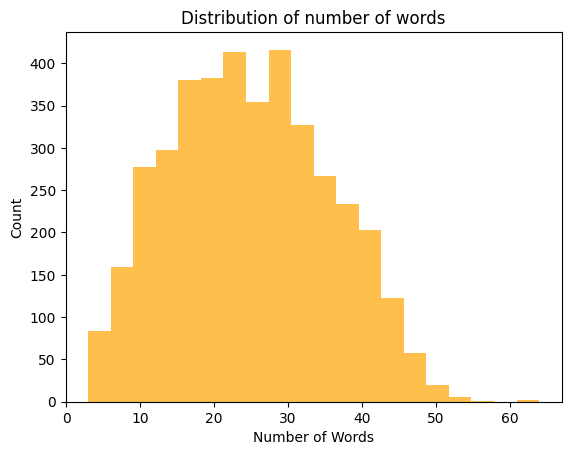

16    148
28    147
23    143
30    140
25    139
Name: Text, dtype: int64

In [27]:
import matplotlib.pyplot as plt

df2_analysis = {}

df2_analysis['num_words'] = df2_structured['Text'].apply(lambda x: len(str(x).split()))
plt.hist(df2_analysis['num_words'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of number of words')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()
display(df2_analysis['num_words'].value_counts().head(5))

Now, the average sentence lenght

In [9]:
def average_sentence_length(text):
    sentences = text.split('.')
    total_words = 0
    total_sentences = len(sentences)

    for sentence in sentences:
        words = sentence.split()
        total_words += len(words)

    return total_words / total_sentences

df2_analysis['average_sentence_length'] = df2_structured['Text'].apply(average_sentence_length)

average_sen_length = df2_analysis['average_sentence_length'].mean()

print('The average sentence length is:', average_sen_length, 'words')


The average sentence length is: 10.253463329032078 words


Now we analyze the total size of the twets (original text) and of the terms (processed text)

In [10]:
def vocabulary_size(text):
    words = text.split()
    unique_words = set(words)
    return len(unique_words)

def term_size(text):
    unique_words = set(text)
    return len(unique_words)


df2_analysis['vocabulary_size'] = df2_structured['Text'].apply(vocabulary_size)

df2_analysis['term_size'] = df2_structured['processed_tweet'].apply(term_size)


total_vocabulary_size = df2_analysis['vocabulary_size'].sum()

total_term_size = df2_analysis['term_size'] .sum()

print('Total vocabulary size:', total_vocabulary_size, 'words')

print('Total terms size:', total_term_size, 'terms')

Total vocabulary size: 94553 words
Total terms size: 71393 terms


Most retweeted tweets

In [11]:
top_retweeted = df2_structured.nlargest(5, 'Retweets')[['Text', 'Retweets']]
print('Top 5 Most Retweeted Tweets:')
print(top_retweeted)

Top 5 Most Retweeted Tweets:
                                                   Text  Retweets
1219  🗺️Situation around Lyman - Sep 30 11:00:\n- UA...       646
2813  📷Unique and rare photos of Ukrainian forward c...       338
3765  📽️Operation Interflex: Ukrainian recruits cont...       283
1846  The following countries have urged their citiz...       251
1387  📽️Russians shelled the outskirts of #Zaporizhz...       247


Most likely tweets

In [12]:
top_liked = df2_structured.nlargest(5, 'Likes')[['Text', 'Likes']]
print('Top 5 Most Liked Tweets:')
print(top_liked)

Top 5 Most Liked Tweets:
                                                   Text  Likes
1219  🗺️Situation around Lyman - Sep 30 11:00:\n- UA...   3701
2813  📷Unique and rare photos of Ukrainian forward c...   2685
3765  📽️Operation Interflex: Ukrainian recruits cont...   2155
2823  📷🇨🇿 Czech volunteer during the ongoing offensi...   1631
205   📽️🇺🇦 Ukrainian forces liberated Drobysheve in ...   1407


Most Used Hashtags in a Tweet.

In [30]:
top_tags = df2_structured['Hashtags'].value_counts()[:5]
print('Top 5 Most Hashtags:')
display(top_tags)

Top 5 Most Hashtags:


[#UkraineRussiaWar]                                                                                            333
[#Ukraine, #UkraineRussiaWar, #UkraineUnderAttack, #UkraineWarNews]                                            206
[#Ukraine, #UkraineRussiaWar]                                                                                   69
[#UkraineWar, #Ukraine, #Russia, #ukrainerussiawar, #Putin, #SanktionengegendieUSA, #MAGA, #俄罗斯, #乌克兰, #中國]     39
[#Russia, #RussiaInvadedUkraine, #Ukraine, #UkraineRussiaWar]                                                   36
Name: Hashtags, dtype: int64

Most used Hashtags.

In [14]:
from collections import Counter
count_tags = Counter(df2_structured['Hashtags'].sum())
df_tags=pd.DataFrame()
df_tags['nTags'] = pd.DataFrame([count_tags]).T
display(df_tags.sort_values(by=['nTags'],ascending=False).head(10))

,nTags
#UkraineRussiaWar,3699
#Ukraine,1860
#Russia,1091
#UkraineWar,1017
#Putin,487
#Kherson,427
#NATO,426
#Ukrainian,404
#Russian,403
#USA,379


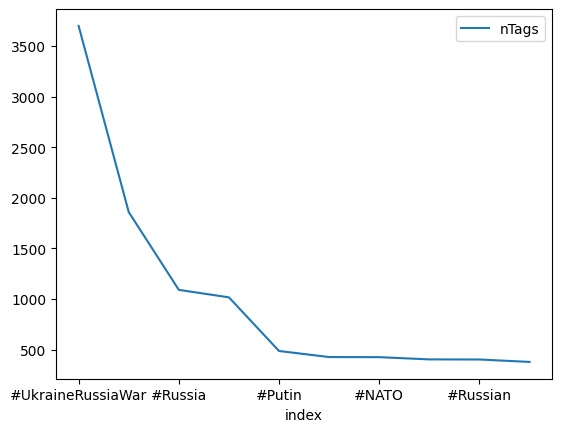

In [15]:
df_tags_plt=df_tags.sort_values(by=['nTags'],ascending=False).head(10)
df_tags_plt= df_tags_plt.reset_index().plot(x='index', y='nTags')

Word clouds for the most frequent words

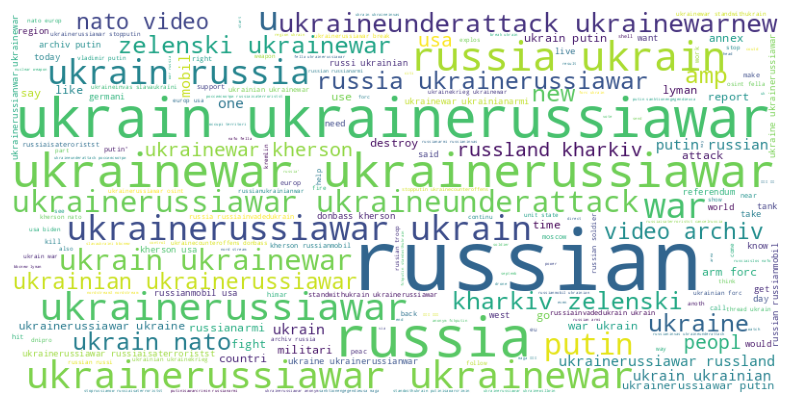

In [16]:
from wordcloud import WordCloud

words = []
stop_words = set(stopwords.words("english"))

for tweet in df2_structured['processed_tweet']:
  for word in tweet:
    words.append(word)

more_stopwords = {"https", "tco"}
stop_words.update(more_stopwords)

wordcloud_text = ' '.join(words)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(wordcloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
def create_index(tweets):
    """
    Implement the inverted index

    Argument:
    lines -- collection of Wikipedia articles

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    """
    index = defaultdict(list)
    tweet_index = {}  # dictionary to map page titles to page ids
    for i, tweet in enumerate(tweets):  #
        #processed_tweet = build_terms(tweets[i])
        tweet_id = int(tweet[6])
        tweet_index[tweet_id] = [tweet[0], tweet[1], tweet[2], tweet[3], tweet[4], tweet[5], tweet[6]]
        terms = tweet[7]

#[processed_tweet['original_text'], processed_tweet['created_at'], processed_tweet['hashtags'], processed_tweet['likes'], processed_tweet['retweets'], processed_tweet['url'], processed_tweet['id'], processed_tweet['processed_text']]
        #el problema esta a que processed_tweet te els terms pero el tweets_structure no.
        ## ===============================================================
        ## create the index for the current page and store it in current_page_index (current_page_index)
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms): # terms contains page_title + page_text. Loop over all terms
            try:
                # if the term is already in the index for the current page (current_page_index)
                # append the position to the corresponding list

        ## START CODE
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term] = [tweet_id, array('I', [position])]#'I' indicates unsigned int (int in Python)

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        ## END CODE

    return index, tweet_index

In [18]:
import time
start_time = time.time()
index, title_index = create_index(tweets_stuctured)
print("Total time to create the index: {} seconds".format(np.round(time.time() - start_time, 2)))

Total time to create the index: 0.48 seconds


Notice that if you look in the index for ```researcher```you will not find any result, while if you look for ```research``` you will get some results. That happens because we are storing in the index stemmed terms.

In [19]:
print("Index results for the term 'fear': {}\n".format(index['war']))
print("First 10 Index results for the term 'fear': \n{}".format(index['war'][:10]))

Index results for the term 'fear': [[1575916494990417920, array('I', [4, 8])], [1575915883385409537, array('I', [8])], [1575915151890399232, array('I', [14])], [1575914586791763968, array('I', [3])], [1575913861957369856, array('I', [15])], [1575912541384941568, array('I', [18])], [1575911381534388225, array('I', [16])], [1575909988618231809, array('I', [17])], [1575909819810484224, array('I', [6])], [1575909339994279936, array('I', [22])], [1575908773553909761, array('I', [18])], [1575908651658641408, array('I', [17])], [1575908646126747648, array('I', [8])], [1575908078352039936, array('I', [8])], [1575907811116322816, array('I', [3])], [1575905281275330561, array('I', [2])], [1575905162195091465, array('I', [1])], [1575904558416642050, array('I', [0])], [1575904177275822081, array('I', [2])], [1575902052982849536, array('I', [15])], [1575901153086570498, array('I', [12])], [1575900576528748544, array('I', [14])], [1575898746868695040, array('I', [1])], [1575898429783318528, array('I